In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/property-listings-in-kuala-lumpur/data_kaggle.csv


In [2]:
df=pd.read_csv('/kaggle/input/property-listings-in-kuala-lumpur/data_kaggle.csv')
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


# Data Cleaning

In [4]:
df.isna().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [5]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

Location          0.000000
Price             0.460256
Rooms             3.166119
Bathrooms         3.735872
Car Parks        32.602119
Property Type     0.046397
Size              1.972793
Furnishing       12.861199
dtype: float64

## Price

In [6]:
# Delete rows where 'Price' column has missing values
df1 = df.dropna(subset=['Price']).copy()  # Create a true copy of df to avoid SettingWithCopyWarning

# Remove 'RM ' prefix and any commas, ensuring only numeric values remain
df1.loc[:, 'Price'] = df1['Price'].str.replace('RM ', '', regex=False).str.replace(',', '', regex=False)

# Convert 'Price' to numeric, coercing any remaining non-numeric entries to NaN
df1.loc[:, 'Price'] = pd.to_numeric(df1['Price'], errors='coerce')

# Drop rows where 'Price' could not be converted to a numeric type (NaN)
df1 = df1.dropna(subset=['Price'])

# Convert 'Price' to float if necessary
df1['Price'] = df1['Price'].astype(float)

# Display descriptive statistics for the cleaned 'Price' column
df1.describe()

,Price,Bathrooms,Car Parks
count,5.363500e+04,51673.000000,36194.000000
mean,2.091947e+06,3.072281,2.008648
std,1.384014e+07,1.630782,1.311154
min,1.000000e+01,1.000000,1.000000
25%,5.800000e+05,2.000000,1.000000
50%,9.900000e+05,2.000000,2.000000
75%,1.996400e+06,4.000000,2.000000
max,1.980000e+09,20.000000,30.000000


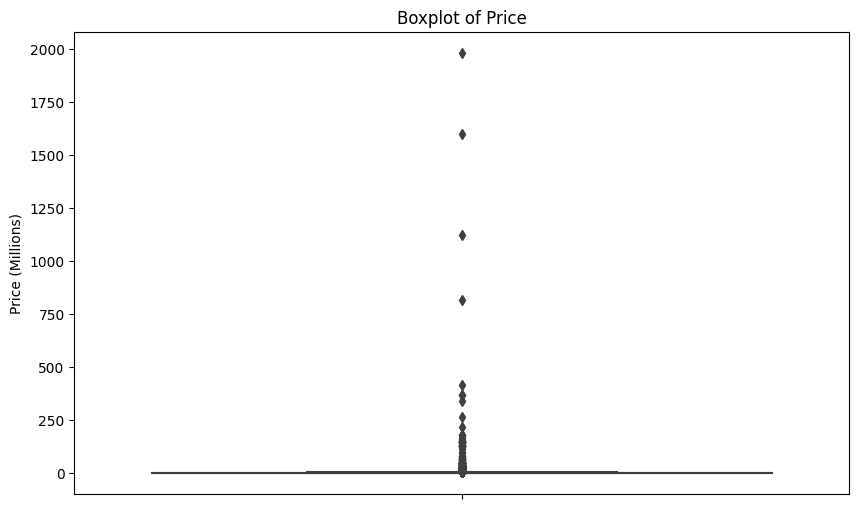

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Price' in millions
sns.boxplot(data=df1, y=df1['Price'] / 1e6)

# Add title and labels
plt.title('Boxplot of Price')
plt.ylabel('Price (Millions)')

# Display the plot
plt.show()

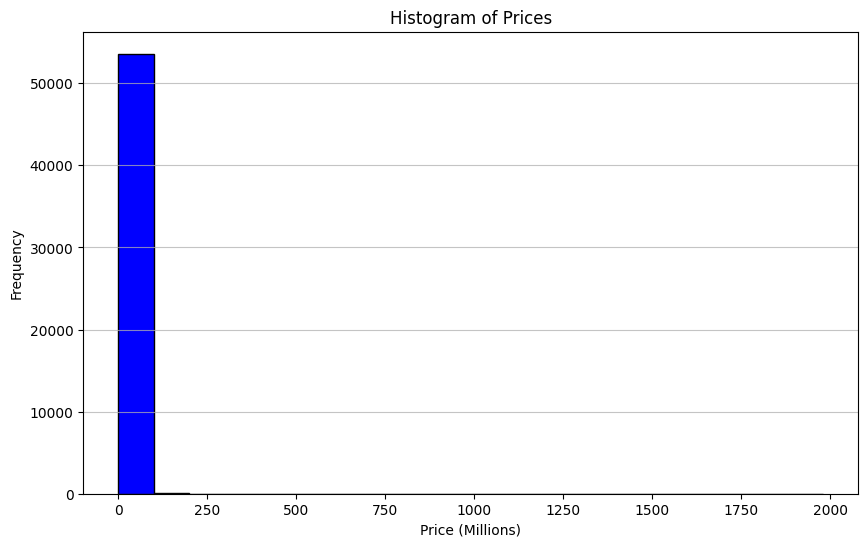

In [8]:
# Creating a histogram for the 'Price' column in millions
plt.figure(figsize=(10, 6))
plt.hist(df1['Price'] / 1e6, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price (Millions)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [9]:
# Filter 'Price' column to keep only values between 8e4 and 5e6
df1 = df1[(df1['Price'] >= 8e4) & (df1['Price'] <= 5e6)]

# Display the updated DataFrame to verify the filtering
print(df1['Price'].describe())

count    4.964900e+04
mean     1.313368e+06
std      1.045728e+06
min      8.100000e+04
25%      5.700000e+05
50%      9.180000e+05
75%      1.698300e+06
max      5.000000e+06
Name: Price, dtype: float64


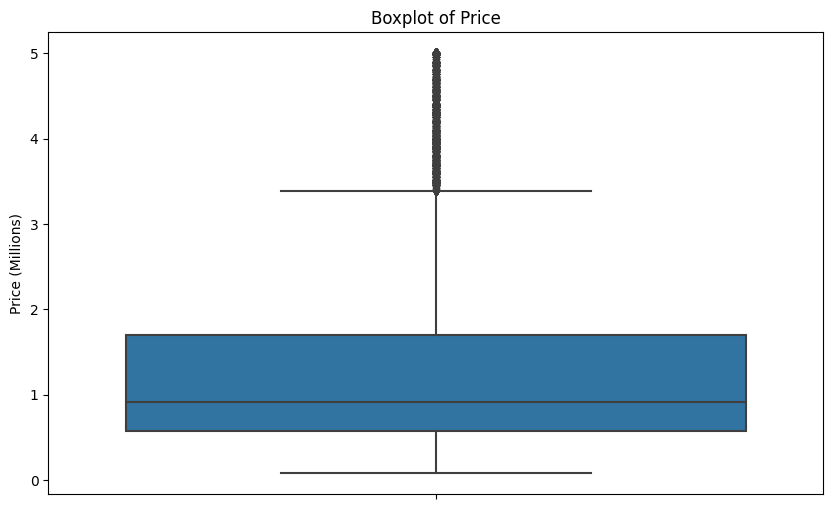

In [10]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Price' in millions
sns.boxplot(data=df1, y=df1['Price'] / 1e6)

# Add title and labels
plt.title('Boxplot of Price')
plt.ylabel('Price (Millions)')

# Display the plot
plt.show()

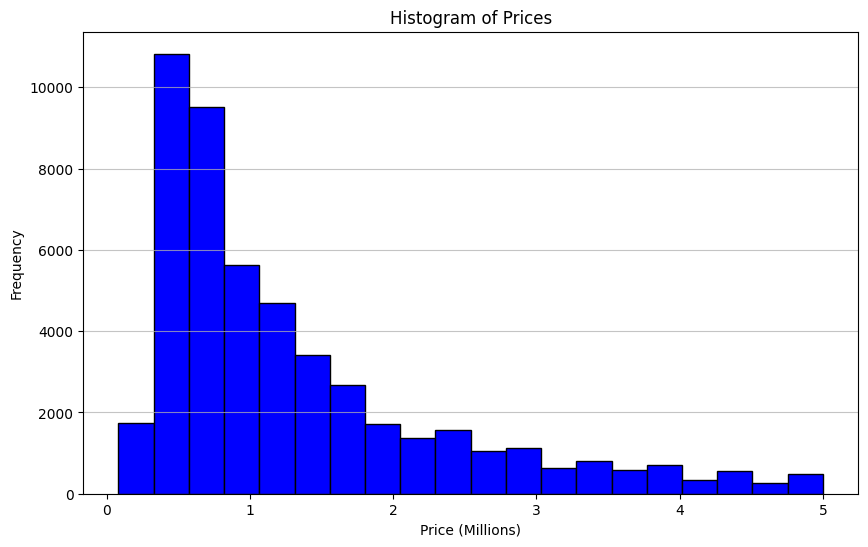

In [11]:
# Creating a histogram for the 'Price' column in millions
plt.figure(figsize=(10, 6))
plt.hist(df1['Price'] / 1e6, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price (Millions)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
df2 = df1.copy()

## Location

In [13]:
# Combined dictionary to map incorrect or inconsistent locations to the standardized format
location_corrections = {
    'Bandar Sri damansara, Kuala Lumpur': 'Bandar Sri Damansara',
    'Klcc, Kuala Lumpur': 'KLCC',
    'Taman Yarl OUG, Kuala Lumpur': 'Taman Yarl',
    'Taman Yarl, UOG, Kuala Lumpur': 'Taman Yarl',
    'cyberjaya, Kuala Lumpur': 'Cyberjaya',
    'kepong, Kuala Lumpur': 'Kepong',
    'duta Nusantara, Kuala Lumpur': 'Duta Nusantara',
    'taman cheras perdana, Kuala Lumpur': 'Taman Cheras Perdana',
    'taman connaught, Kuala Lumpur': 'Taman Connaught',
}

# Apply the corrections using the dictionary and remove ", Kuala Lumpur"
df2['Location'] = df2['Location'].replace(location_corrections)
df2['Location'] = df2['Location'].str.replace(', Kuala Lumpur', '', regex=False)

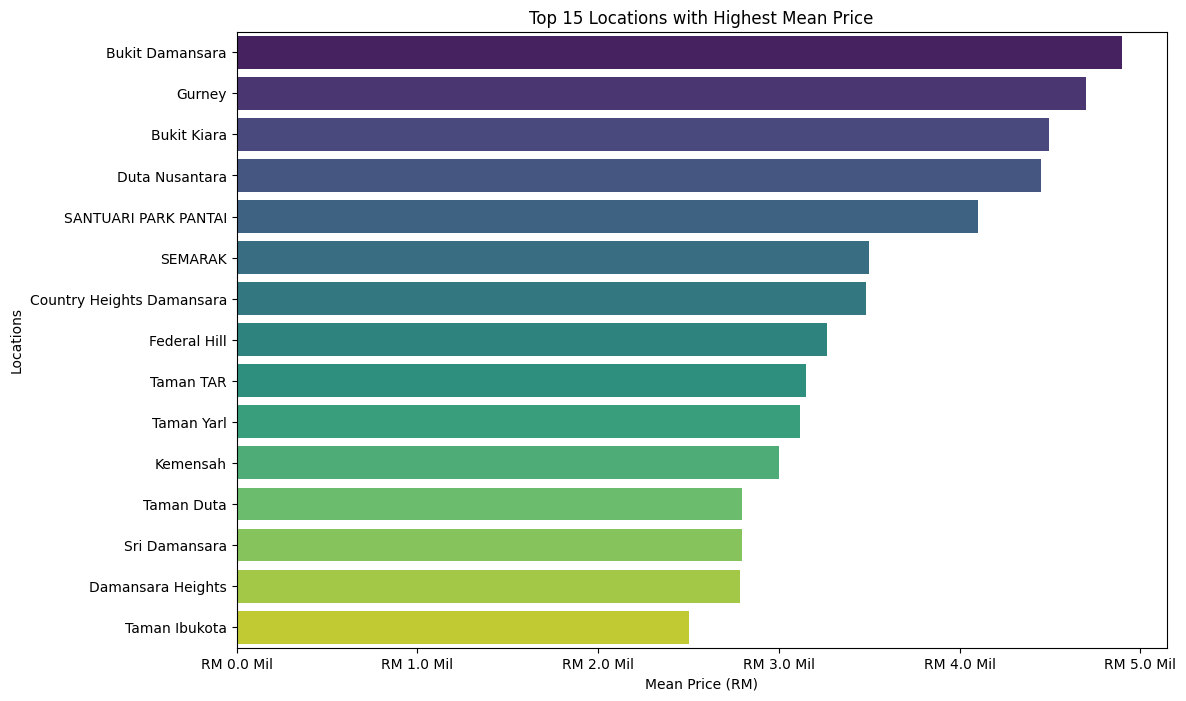

In [14]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Group by 'Location' and calculate the mean of 'Price'
mean_price_by_location_high = df2.groupby('Location')['Price'].mean().sort_values(ascending=False).head(15)

# Plotting the top 15 location by mean price
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_price_by_location_high.values, y=mean_price_by_location_high.index, palette='viridis')

# Customize x-axis ticks to display in million (RM Mil)
formatter = FuncFormatter(lambda x, _: f'RM {x / 10**6:.1f} Mil')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 15 Locations with Highest Mean Price')
plt.xlabel('Mean Price (RM)')
plt.ylabel('Locations')
plt.show()

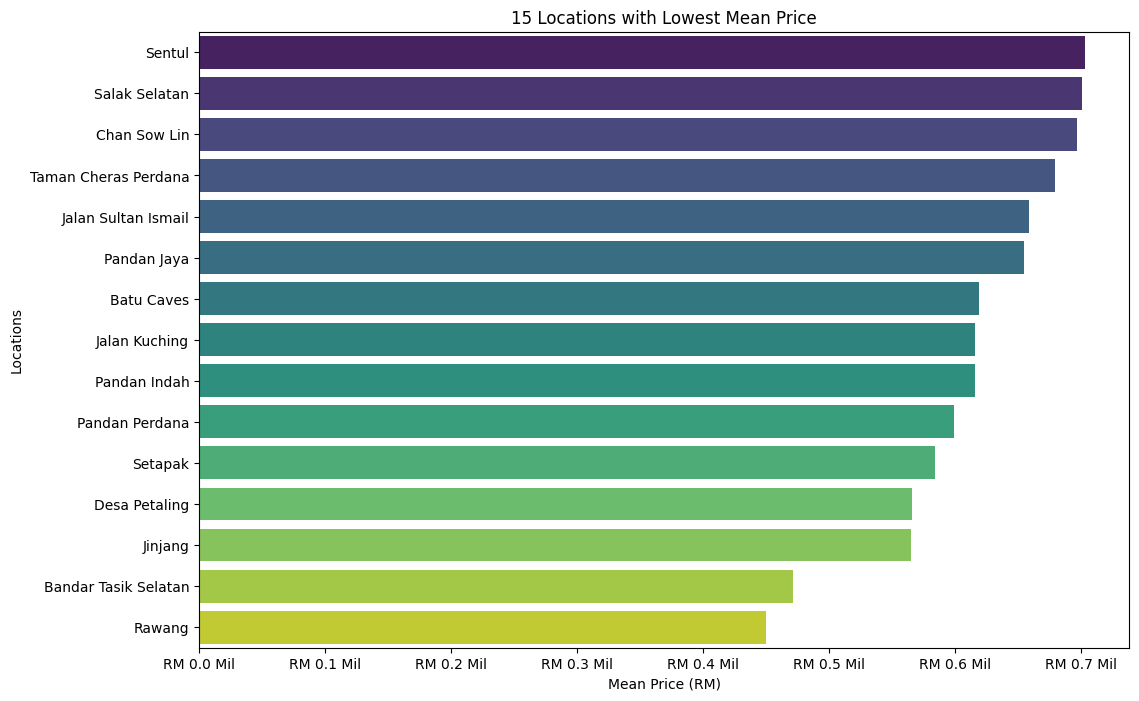

In [15]:
# Group by 'Location' and calculate the mean of 'Price'
mean_price_by_location_low = df2.groupby('Location')['Price'].mean().sort_values(ascending=False).tail(15)

# Plotting the bottom 15 locations by mean price
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_price_by_location_low.values, y=mean_price_by_location_low.index, palette='viridis')

# Customize x-axis ticks to display in million (RM Mil)
formatter = FuncFormatter(lambda x, _: f'RM {x / 10**6:.1f} Mil')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('15 Locations with Lowest Mean Price')
plt.xlabel('Mean Price (RM)')
plt.ylabel('Locations')
plt.show()

In [16]:
# Assign the modified DataFrame to df1 as the output
df3 = df2.copy()

## Rooms

In [17]:
def clean_room_value(value):
    if pd.isnull(value) or value == '':
        return np.nan
    elif '+' in value:
        parts = value.split('+')
        if len(parts) == 2 and all(part.strip().isdigit() for part in parts):
            return int(parts[0]) + int(parts[1])
        elif 'Above' in value:
            return int(value.split()[0])
    elif value.strip() == 'Studio':
        return 1  # Assuming studio means 1 room
    else:
        try:
            return int(value)
        except ValueError:
            return np.nan  # Return NaN for any other unexpected values

# Apply the cleaning function to the 'Rooms' column using .loc
df3.loc[:, 'Rooms_Cleaned'] = df3['Rooms'].apply(clean_room_value)

# Check the unique values after cleaning
print("Cleaned unique values in 'Rooms':", df3['Rooms_Cleaned'].unique())

Cleaned unique values in 'Rooms': [ 3.  5.  4.  7.  6.  1.  2. nan  8.  9. 10. 18. 11. 12.]


In [18]:
# Calculate the mode of the cleaned 'Rooms' column
mode_value = df3['Rooms_Cleaned'].mode()[0]

# Fill missing values in 'Rooms_Cleaned' with the mode
df3['Rooms_Cleaned'] = df3['Rooms_Cleaned'].fillna(mode_value)

# Convert the 'Rooms_Cleaned' to integer type
df3['Rooms_Cleaned'] = df3['Rooms_Cleaned'].astype(int)

# Check the unique values and their counts in ascending order
unique_counts = df3['Rooms_Cleaned'].value_counts().sort_index()

# Display the unique values with their counts
print("Unique values and their counts in 'Rooms_Cleaned':")
print(unique_counts)

# Display the mode value
print("\nMode value of 'Rooms_Cleaned':", mode_value)

Unique values and their counts in 'Rooms_Cleaned':
Rooms_Cleaned
1      3132
2      6488
3     17012
4     12818
5      6224
6      2879
7       887
8       150
9        42
10       10
11        3
12        3
18        1
Name: count, dtype: int64

Mode value of 'Rooms_Cleaned': 3.0


In [19]:
# Drop rows where 'Rooms_Cleaned' is greater than 10
df3 = df3[df3['Rooms_Cleaned'] <= 10]

# Drop the 'Rooms' column from df3
df3 = df3.drop(columns=['Rooms'])

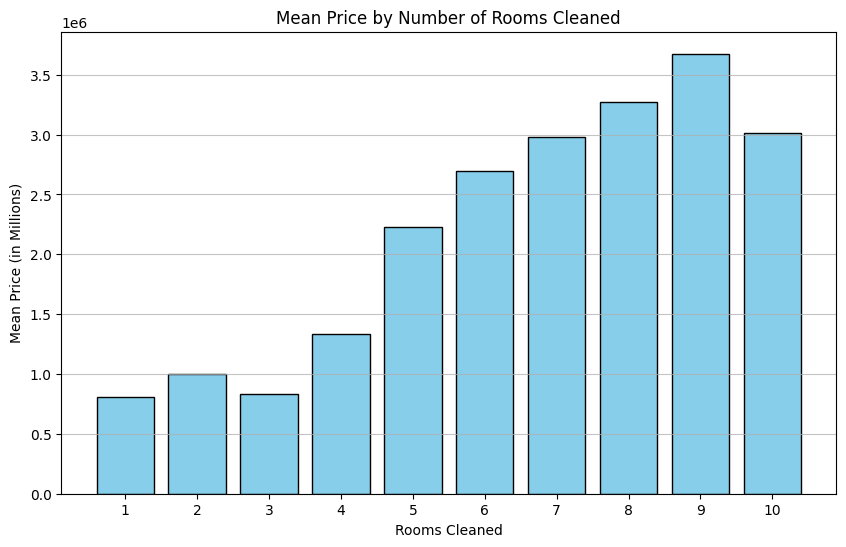

In [20]:
# Group by 'Rooms_Cleaned' and calculate the mean 'Price'
mean_price_per_room = df3.groupby('Rooms_Cleaned')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mean_price_per_room['Rooms_Cleaned'], mean_price_per_room['Price'], color='skyblue', edgecolor='black')
plt.title('Mean Price by Number of Rooms Cleaned')
plt.xlabel('Rooms Cleaned')
plt.ylabel('Mean Price (in Millions)')
plt.xticks(mean_price_per_room['Rooms_Cleaned'])  # Set x-ticks to show each room value
plt.grid(axis='y', alpha=0.75)
plt.show()

In [21]:
df4 = df3.copy()

## Bathrooms

In [22]:
# Check the unique values before cleaning
print("Unique values in 'Bathrooms':", df4['Bathrooms'].unique())

# Find the mode
mode_value_Bathrooms = df4['Bathrooms'].mode()[0]
print("\nMode of 'Bathrooms':", mode_value_Bathrooms)

# Assign the mode to missing values using .loc to avoid the SettingWithCopyWarning
df3.loc[:, 'Bathrooms'] = df4['Bathrooms'].fillna(mode_value_Bathrooms)

# Check unique values and their counts in ascending order
unique_counts_Bathrooms = df4['Bathrooms'].value_counts(dropna=False).sort_index()
print("\nUnique values and counts (ascending):")
print(unique_counts_Bathrooms)

Unique values in 'Bathrooms': [ 3.  4.  2.  5.  7.  6.  1.  8. nan  9. 20. 10. 11. 15.]

Mode of 'Bathrooms': 2.0

Unique values and counts (ascending):
Bathrooms
1.0      4444
2.0     21122
3.0      9343
4.0      6228
5.0      4136
6.0      2289
7.0       574
8.0       168
9.0        45
10.0        6
11.0        1
15.0        1
20.0        6
NaN      1279
Name: count, dtype: int64


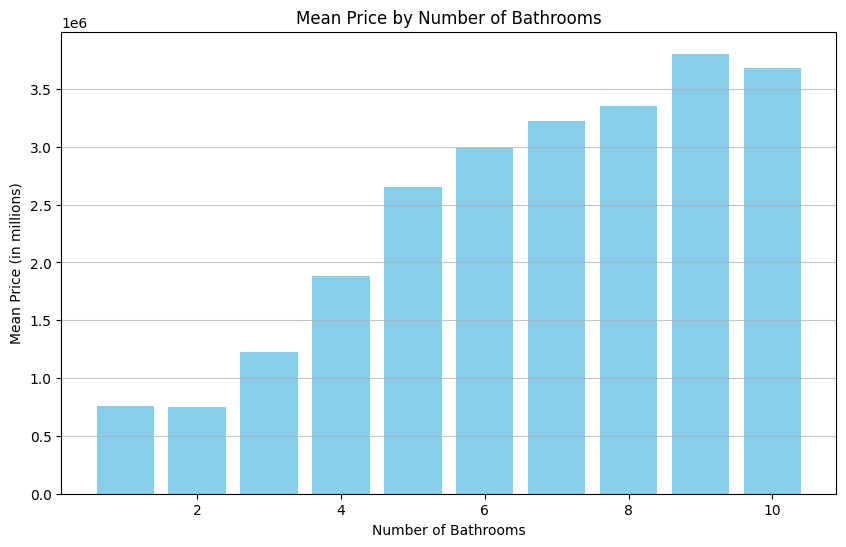

In [23]:
# Drop rows where 'Bathrooms' is greater than 10
df4 = df4[df4['Bathrooms'] <= 10]

# Group by 'Bathrooms' and calculate the mean 'Price'
mean_price_by_bathrooms = df4.groupby('Bathrooms')['Price'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.bar(mean_price_by_bathrooms['Bathrooms'], mean_price_by_bathrooms['Price'], color='skyblue')
plt.title('Mean Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Mean Price (in millions)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [24]:
df5 = df4.copy()

## Car Parks

In [25]:
# Check the unique values before cleaning
print("Unique values in 'Car Parks':", df5['Car Parks'].unique())

# Find the mode for 'Car Parks'
mode_value_CarParks = df5['Car Parks'].mode()[0]
print("\nMode of 'Car Parks':", mode_value_CarParks)

# Assign the mode to missing values using .loc to avoid the SettingWithCopyWarning
df5.loc[:, 'Car Parks'] = df5['Car Parks'].fillna(mode_value_CarParks)

# Rename the 'Car Parks' column to 'CarParks'
df5.rename(columns={'Car Parks': 'CarParks'}, inplace=True)

# Check unique values and their counts in ascending order
unique_counts_CarParks = df5['CarParks'].value_counts(dropna=False).sort_index()
print("\nUnique values and counts (ascending):")
print(unique_counts_CarParks)

Unique values in 'Car Parks': [ 2.  4.  3.  1. nan  5.  6.  7.  9.  8. 10. 13. 20. 24. 12. 30. 11. 15.]

Mode of 'Car Parks': 2.0

Unique values and counts (ascending):
CarParks
1.0     13409
2.0     29206
3.0      3469
4.0      1524
5.0       323
6.0       307
7.0        31
8.0        50
9.0         3
10.0       22
11.0        1
12.0        4
13.0        1
15.0        2
20.0        1
24.0        1
30.0        1
Name: count, dtype: int64


In [26]:
# Drop rows where 'CarParks' is greater than 10
df5 = df5[df5['CarParks'] <= 10]

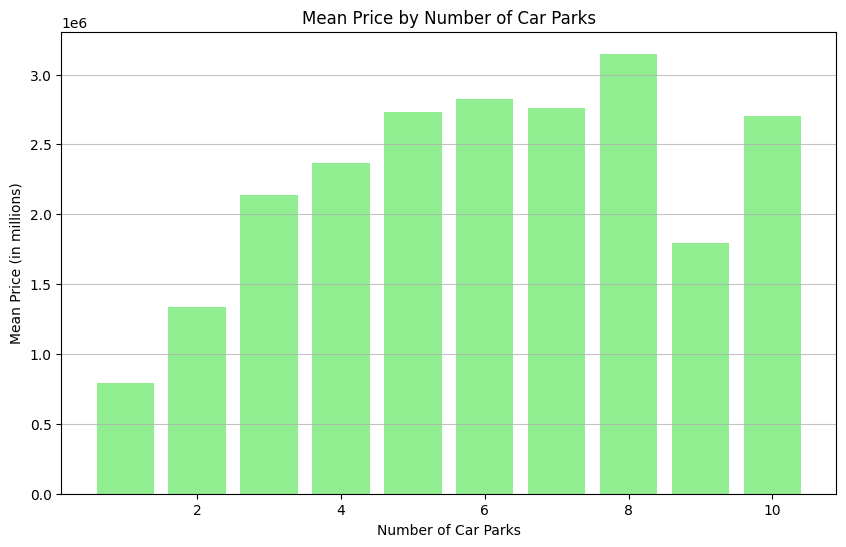

In [27]:
# Group by 'CarParks' and calculate the mean 'Price'
mean_price_by_carparks = df5.groupby('CarParks')['Price'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.bar(mean_price_by_carparks['CarParks'], mean_price_by_carparks['Price'], color='lightgreen')
plt.title('Mean Price by Number of Car Parks')
plt.xlabel('Number of Car Parks')
plt.ylabel('Mean Price (in millions)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [28]:
df6 = df5.copy()

## Property Type

In [29]:
# Drop rows where 'Property Type' is missing (NaN)
df6 = df6.dropna(subset=['Property Type'])

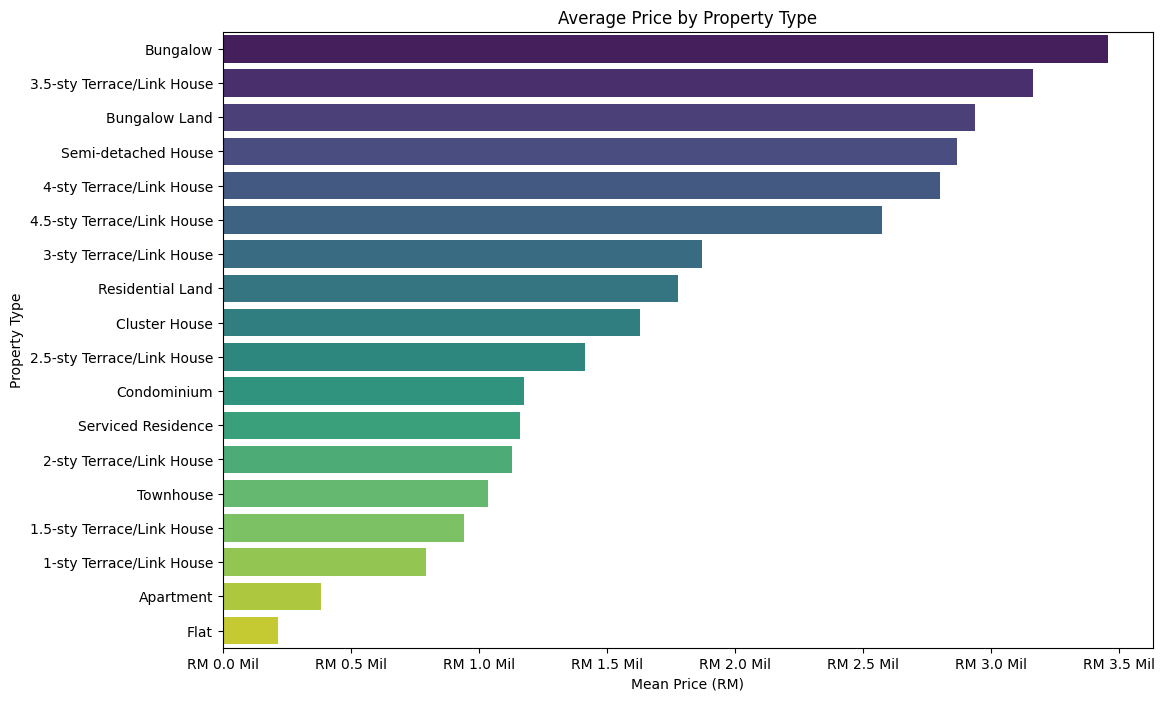

In [30]:
import re

# Standardize property types by removing details like "(Corner)", "(EndLot)", etc.
df6['Generalized_Property_Type'] = df6['Property Type'].apply(lambda x: re.sub(r" \(.+\)", "", x))

# Group by the generalized property type and calculate the mean price
mean_price_by_type = df6.groupby('Generalized_Property_Type')['Price'].mean().sort_values(ascending=False)

# Plotting the bar chart for the mean price of each generalized property type
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_price_by_type.values, y=mean_price_by_type.index, palette='viridis')

# Customize x-axis to display in million (RM Mil)
formatter = FuncFormatter(lambda x, _: f'RM {x / 10**6:.1f} Mil')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Average Price by Property Type')
plt.xlabel('Mean Price (RM)')
plt.ylabel('Property Type')
plt.show()

In [31]:
# Drop the 'Property Type' column from df6
df6 = df6.drop(columns=['Property Type'])

In [32]:
df7 = df6.copy()

## Size

In [33]:
# Define conversion factors
hectares_to_sqft = 107639
acres_to_sqft = 43560
sqm_to_sqft = 10.7639

def convert_to_sqft(size):
    # Remove commas and apostrophes
    size = size.replace(',', '').replace("'", "")
    
    # Handle area dimensions (e.g., '18x60')
    if 'x' in size or 'X' in size:
        dimensions = re.findall(r'(\d+)', size)
        if len(dimensions) == 2:
            return int(dimensions[0]) * int(dimensions[1])
    
    # Handle specific units
    if 'sq. m.' in size:
        numbers = re.findall(r'(\d+\.?\d*)', size)
        if numbers:
            return float(numbers[0]) * sqm_to_sqft
    elif 'hectare' in size:
        numbers = re.findall(r'(\d+\.?\d*)', size)
        if numbers:
            return float(numbers[0]) * hectares_to_sqft
    elif 'acre' in size:
        numbers = re.findall(r'(\d+\.?\d*)', size)
        if numbers:
            return float(numbers[0]) * acres_to_sqft
    elif 'sq. ft.' in size:
        numbers = re.findall(r'(\d+\.?\d*)', size)
        if numbers:
            return float(numbers[0])
    
    # If no valid match, return None
    return None

# Apply the function to the 'Size' column and convert the results to integers
df6['Size_cleaned'] = df6['Size'].apply(lambda x: convert_to_sqft(x) if isinstance(x, str) else None)

# Drop rows with invalid matches (None) and convert remaining to integers
df7 = df6.dropna(subset=['Size_cleaned']).copy()  # Create a copy to avoid SettingWithCopyWarning
df7.loc[:, 'Size_cleaned'] = df7['Size_cleaned'].astype(int)  # Use .loc to avoid the warning

# Drop the original 'Size' column from df7
df7 = df7.drop(columns=['Size'])

In [34]:
df7.describe()

,Price,Bathrooms,CarParks,Rooms_Cleaned,Size_cleaned
count,4.739500e+04,47395.000000,47395.000000,47395.000000,4.739500e+04
mean,1.304219e+06,2.900095,1.917987,3.534972,1.568235e+04
std,1.033255e+06,1.419530,0.846992,1.350947,1.262374e+06
min,8.100000e+04,1.000000,1.000000,1.000000,0.000000e+00
25%,5.700000e+05,2.000000,1.000000,3.000000,9.990000e+02
50%,9.100000e+05,2.000000,2.000000,3.000000,1.368000e+03
75%,1.680000e+06,4.000000,2.000000,4.000000,2.000000e+03
max,5.000000e+06,10.000000,10.000000,10.000000,1.807740e+08


In [35]:
# Remove rows where 'Size_cleaned' is greater than 3500 or less than 400
df7 = df7[(df7['Size_cleaned'] <= 3500) & (df7['Size_cleaned'] >= 400)]

# Confirm the result by checking the minimum value
print("Minimum value in 'Size_cleaned' after filtering:", df7['Size_cleaned'].min())


Minimum value in 'Size_cleaned' after filtering: 400.0


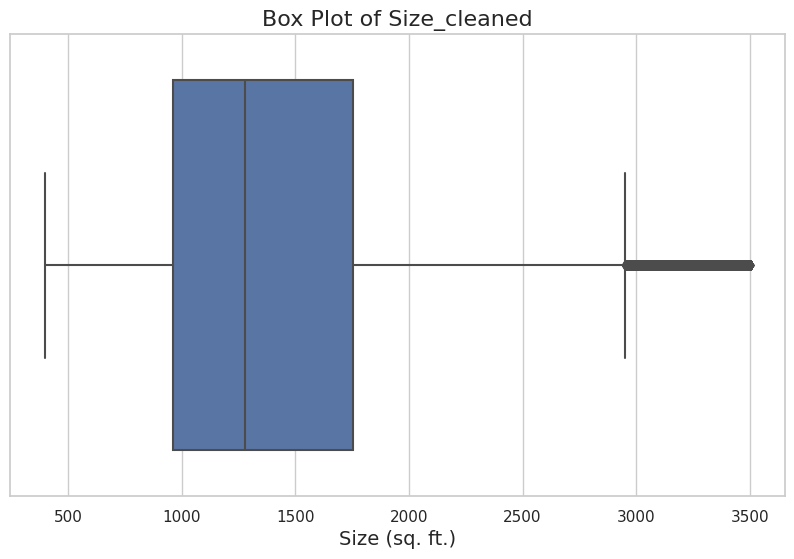

In [36]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box plot for Size_cleaned
plt.figure(figsize=(10, 6))
sns.boxplot(x=df7['Size_cleaned'])

# Adding titles and labels
plt.title('Box Plot of Size_cleaned', fontsize=16)
plt.xlabel('Size (sq. ft.)', fontsize=14)

# Show the plot
plt.show()

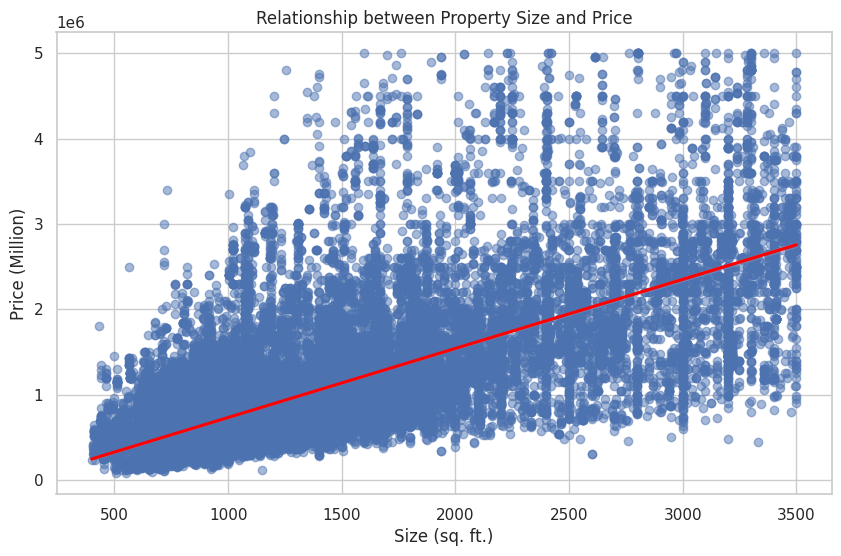

In [37]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Scatter plot with a regression line
sns.regplot(x='Size_cleaned', y='Price', data=df7, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

# Label the axes and title
plt.xlabel('Size (sq. ft.)')
plt.ylabel('Price (Million)')
plt.title('Relationship between Property Size and Price')

# Show the plot
plt.show()

In [38]:
df8 = df7.copy()

## Furnishing

In [39]:
# Check the unique values before cleaning
print("Unique values in 'Furnishing':", df8['Furnishing'].unique())

# Find the mode for 'Furnishing'
mode_value_Furnishing = df8['Furnishing'].mode()[0]
print("\nMode of 'Furnishing':", mode_value_Furnishing)

# Replace missing values and 'Unknown' with the mode value
df8['Furnishing'] = df8['Furnishing'].replace('Unknown', mode_value_Furnishing)
df8['Furnishing'] = df8['Furnishing'].fillna(mode_value_Furnishing)

# Check unique values and their counts in ascending order
unique_counts_Furnishing = df8['Furnishing'].value_counts(dropna=False).sort_index()
print("\nUnique values and counts (ascending):")
print(unique_counts_Furnishing)

Unique values in 'Furnishing': ['Fully Furnished' 'Partly Furnished' nan 'Unfurnished' 'Unknown']

Mode of 'Furnishing': Partly Furnished

Unique values and counts (ascending):
Furnishing
Fully Furnished     12060
Partly Furnished    25697
Unfurnished          4663
Name: count, dtype: int64


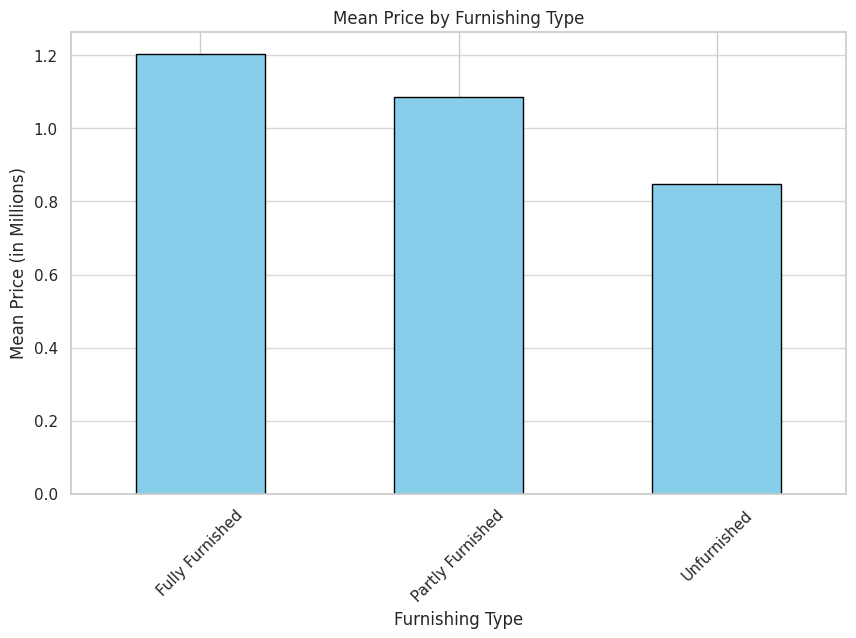

In [40]:
# Calculate the mean Price by Furnishing type
mean_price_by_furnishing = df8.groupby('Furnishing')['Price'].mean() / 1e6  # Convert to millions

# Create the bar chart
plt.figure(figsize=(10, 6))
mean_price_by_furnishing.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Price by Furnishing Type')
plt.xlabel('Furnishing Type')
plt.ylabel('Mean Price (in Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [41]:
df9 = df8.copy()

# Preprocess

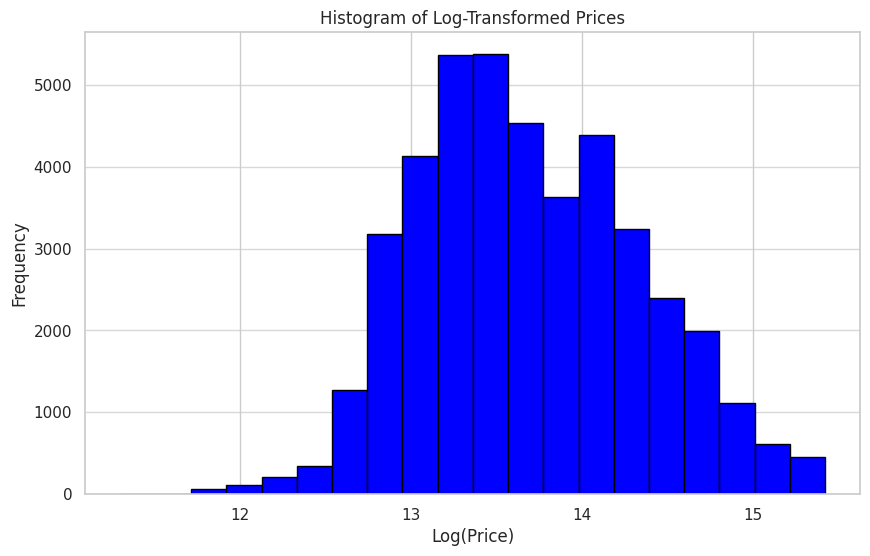

In [42]:
from scipy import stats

# Apply transformations
df9['Price_log'] = np.log1p(df9['Price'])  # Using log1p to handle zero values
df9['Price_sqrt'] = np.sqrt(df9['Price'])
df9['Price_boxcox'], _ = stats.boxcox(df9['Price'])

# Plot histogram of log-transformed prices
plt.figure(figsize=(10, 6))
plt.hist(df9['Price_log'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Log-Transformed Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Frequency Encoding

In [43]:
# Frequency Encoding
location_frequency = df9['Location'].value_counts()
df9['Location_encoded'] = df9['Location'].map(location_frequency)

# Drop the original Location column
df9 = df9.drop(columns=['Location'])

## One-hot encoding

In [44]:
# Check the columns in df9
print("Columns in df9:", df9.columns.tolist())

Columns in df9: ['Price', 'Bathrooms', 'CarParks', 'Furnishing', 'Rooms_Cleaned', 'Generalized_Property_Type', 'Size_cleaned', 'Price_log', 'Price_sqrt', 'Price_boxcox', 'Location_encoded']


In [45]:
# Apply one-hot encoding to 'Furnishing' column in df9 (adjusting case if necessary)
df9_one_hot_furnishing = pd.get_dummies(df9['Furnishing'], prefix='Furnishing', drop_first=True)

# Apply one-hot encoding to 'Generalized_Property_Type' column in df9
df9_one_hot_generalized = pd.get_dummies(df9['Generalized_Property_Type'], prefix='Property_Type', drop_first=True)

# Concatenate the one-hot encoded columns with the original df9 DataFrame
df9 = pd.concat([df9, df9_one_hot_furnishing, df9_one_hot_generalized], axis=1)

# Drop the original 'Furnishing' and 'Generalized_Property_Type' columns from df9
df9 = df9.drop(columns=['Furnishing', 'Generalized_Property_Type'])

In [46]:
# Drop the unnecessary price columns
df9 = df9.drop(columns=['Price', 'Price_sqrt', 'Price_boxcox'])

In [47]:
df9.head()

,Bathrooms,CarParks,Rooms_Cleaned,Size_cleaned,Price_log,Location_encoded,Furnishing_Partly Furnished,Furnishing_Unfurnished,Property_Type_1.5-sty Terrace/Link House,Property_Type_2-sty Terrace/Link House,...,Property_Type_4.5-sty Terrace/Link House,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Cluster House,Property_Type_Condominium,Property_Type_Flat,Property_Type_Residential Land,Property_Type_Semi-detached House,Property_Type_Serviced Residence,Property_Type_Townhouse
0,3.0,2.0,3,1335.0,14.038655,4310,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,4.0,2.0,3,1875.0,13.845070,1120,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,3.0,2.0,5,1513.0,13.710151,2291,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8,4.0,3.0,5,1875.0,14.483340,722,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,2.0,1.0,3,904.0,12.861001,583,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# Train a Model

In [48]:
X=df9.drop(['Price_log'], axis='columns') 
y=df9.Price_log

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6510945335933722

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.66561098, 0.65656006, 0.66440466, 0.66511965, 0.66028924])

In [52]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()), 
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False]  # fit_intercept now under 'regressor'
            }
        },
        'lasso': {
            'model': Pipeline([
                ('scaler', StandardScaler()), 
                ('regressor', Lasso())
            ]),
            'params': {
                'regressor__alpha': [1, 2],
                'regressor__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': Pipeline([
                ('scaler', StandardScaler()), 
                ('regressor', DecisionTreeRegressor())
            ]),
            'params': {
                'regressor__criterion': ['squared_error', 'friedman_mse'],  # Updated here
                'regressor__splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Now run the function with X and y
result = find_best_model_using_gridsearchcv(X, y)
print(result)

               model  best_score  \
0  linear_regression    0.662397   
1              lasso   -0.000210   
2      decision_tree    0.903179   

                                         best_params  
0                 {'regressor__fit_intercept': True}  
1  {'regressor__alpha': 1, 'regressor__selection'...  
2  {'regressor__criterion': 'squared_error', 'reg...  


In [53]:
#include some documentation will do

In [54]:
#3 main factors